# Machine Learning Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [2]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [3]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [4]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
### optimize model
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, FastICA

In [153]:
ds = pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [155]:
ds.head()

,PB030: PERSONAL ID,PB020: COUNTRY,PB010: YEAR OF THE SURVEY,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,...,PW130: TRUST IN THE POLITICAL SYSTEM,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
0,35601,DE,2013,1977,1,2.0,3,0,2,3.0,...,3.0,6.0,10.0,8.0,2.0,1.0,-1.0,7.0,8.0,-1.0
1,44701,DE,2013,1936,1,2.0,1,0,2,2.0,...,7.0,4.0,-1.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,59901,DE,2013,1952,2,2.0,3,0,1,5.0,...,3.0,8.0,9.0,10.0,1.0,1.0,-1.0,10.0,6.0,2.0
3,71101,DE,2013,1938,2,2.0,3,0,2,2.0,...,5.0,7.0,5.0,8.0,1.0,-1.0,6.0,9.0,5.0,3.0
4,79501,DE,2013,1950,2,5.0,3,0,2,3.0,...,0.0,2.0,-1.0,2.0,1.0,-1.0,5.0,2.0,10.0,1.0


In [156]:
#subsets
background = ['PB140: YEAR OF BIRTH','PB150: SEX','PB190: MARITAL STATUS','PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']

education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION']

health = ['PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

job= ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
      "PY090G++: SOCIAL BENEFITS"]
jobdiff=['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']


bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']


sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

subsets= [background,education,work,health,job,bneeds, sat]
columns = []
for x in subsets:
    for y in x:
        columns.append (y)
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION',
 'PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G++: SOCIAL BENEFITS',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/fami

# 0 Superfunctions

In [8]:
# refresh ds
def reload():
    return pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

## 0.1 binning

In [9]:
def pbin(column_to_bin, x):
    bin_labels = [x for x in range(0,x)]

    equal_bins = pd.cut(ds[column_to_bin], x, labels = bin_labels)
    return equal_bins

def qbin(column_to_bin, x):
    bin_labels = [x for x in range(0,x)]

    equal_bins = pd.qcut(ds[column_to_bin], x, labels = bin_labels)
    return equal_bins

In [10]:
binned =pbin('PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',5)

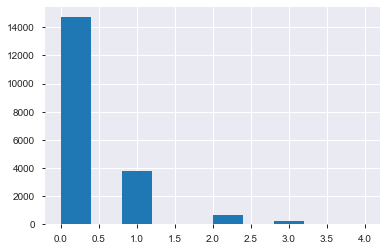

In [11]:
binned.hist()

## 0.2 generate train and test

In [12]:
### generate tests with several binning
# binning first
def generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):
    outcome = ds[y_interested]
    features = ds[X_interested]
    outcomelist=y_interested
    featureslist=X_interested
    data =pd.merge(features, outcome, left_index=True, right_index=True)
    
    # create dummy
    categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]
    


    create_dummy=set(featureslist).intersection(categorical)
    data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
    if dummy=='yes':
        data = data_dummy
    
    ## drop na in outcome
    if drop_na_in_y == 'yes':
        data = data[data[outcomelist]>=0]
    
    ## split dataset again in x and y
    XCol=list(data.columns)
    XCol.remove(outcomelist)
    YCol=outcomelist
    Xtouse = data[XCol]
    y= data[YCol]

    
    # scaler
    if scalertouse == "Standard":
        scaler = StandardScaler()
        X_ = scaler.fit_transform(Xtouse)
    elif scalertouse == "MinMax":
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_ = scaler.fit_transform(Xtouse)
        X_.shape
    elif scalertouse == "Normalizer":
        scaler = Normalizer()
        X_ = scaler.fit_transform(Xtouse)
        X_.shape
    else: 
        X_ = Xtouse
    
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

## 0.2  Regression

In [13]:
# maxximize function to split and run all the models:

def regmodel (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):

    X_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[0]
    X_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[1]
    y_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[2]
    y_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[3]

    
    print("X: ", X_interested)
    print("Y: ", y_interested,"\n")
    
    # Linear Regression
    lm = LinearRegression()
    model = lm.fit(X_train,y_train)

    print("Intercept: ", lm.intercept_)
    print("Coef: ", lm.coef_)

    y_pred  = lm.predict(X_test)
    print ("linear aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("linear MSE: ",mean_squared_error(y_test, y_pred))
    print ("linear R2: ",r2_score(y_test, y_pred), "\n")
    
    
    ### Regression Tree
    regr = DecisionTreeRegressor(random_state = 29)
    model = regr.fit(X_train, y_train)
    y_pred  = regr.predict(X_test)
    regr.score(X_test, y_test)
    print ("Regression Tree aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("Regression Tree MSE: ",mean_squared_error(y_test, y_pred))
    print ("Regression Tree R2: ",r2_score(y_test, y_pred),"\n")
    
    ### KNeighborsRegressor
    knnr = KNeighborsRegressor(n_neighbors = 3)
    model = knnr.fit(X_train, y_train)  #fit the model
    y_pred = knnr.predict(X_test)
    print ("KNeighbores aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("KNeighbores MSE: ",mean_squared_error(y_test, y_pred))
    print ("KNeighbores R2: ",r2_score(y_test, y_pred))

In [14]:
regmodel(bneeds,'PW130: TRUST IN THE POLITICAL SYSTEM', 'yes', 'yes', 'no')

X:  ['PD020: Replace worn-out clothes by some new (not second-hand) ones', 'PD030: Two pairs of properly fitting shoes', 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month', 'PD060: Regularly participate in a leisure activity', 'PD070: Spend a small amount of money each week on yourself', 'PD080: Internet connection for personal use at home']
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 

Intercept:  4.933521752072671
Coef:  [-0.01747555 -0.00796025 -0.05523585  0.12822046  0.00334765  0.04670668]
linear aMSE:  2.1416127503146623
linear MSE:  6.891784291438494
linear R2:  -0.0008918391105221524 

Regression Tree aMSE:  2.146796240068245
Regression Tree MSE:  6.906458185110223
Regression Tree R2:  -0.0030229244438595426 

KNeighbores aMSE:  2.5636055502595063
KNeighbores MSE:  9.90802527980793
KNeighbores R2:  -0.4389396453658594


## 0.4  Classification

In [15]:
# maxximize function to split and run all the models:
## y binning first
def class_bin (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):

    X_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[0]
    X_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[1]
    y_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[2]
    y_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[3]

    
    print("X: ", X_interested)
    print("Y: ", y_interested, "\n")
    
    # logistic regression
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    #tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    #matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    #print(matrix)
    print( "Logistic regression - accuracy: ", str(round(lr.score(X_test, y_test)*100,2)))
    print( "Logistic regression - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n")

    # Decision Tree classyier
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    #tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    #matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    #print(matrix)
    print( "Decision tree - accuracy  ", str(round(dtc.score(X_test, y_test)*100,2)))
    print( "Decision tree - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n")  
      
    # super vector machine (takes too much time)                                          
                                                   
    # KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    #tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    #matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    print(conf)
    print( "KNeighborsClassifier - accuracy  ", str(round(knn.score(X_test, y_test)*100,2)))
    print( "KNeighborsClassifier - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n") 

In [16]:
class_bin(background, 'PW130: TRUST IN THE POLITICAL SYSTEM', 'yes' , 'yes', 'MaxMin')

X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 

Logistic regression - accuracy:  17.73
Logistic regression - precision nan 

Decision tree - accuracy   13.09
Decision tree - precision 60.87 



C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


[[ 38  27  38  29  29  41  21  10   6   0   0]
 [ 28  20  22  18  18  29  21   8   5   0   0]
 [ 45  19  40  35  24  60  37  16  14   0   0]
 [ 48  34  38  36  34  51  37  14   9   2   0]
 [ 35  23  48  31  29  67  22  15   9   2   0]
 [ 80  57  87  76  56 110  47  25  20   0   0]
 [ 45  34  51  63  58  55  31  19   5   1   0]
 [ 73  34  60  39  47  58  26  18  11   1   0]
 [ 48  42  62  48  47  80  33  22   6   1   0]
 [ 17  14  21  19  15  33   8   3   3   0   0]
 [ 10   4   9  12   4  11   1   4   1   0   0]]
KNeighborsClassifier - accuracy   10.42
KNeighborsClassifier - precision 57.58 



In [17]:
def tryclass_bin(xes,yli,nrbinx, dummy, drop_na_in_y, scalertouse):
    ds=reload()
    # x biningfor x in try1:
    for x in xes:
        if len(ds[x].unique())>nrbinx:
               ds[x]=pbin(x,nrbinx)
    # y binning
    for x in xes: 
        print(x, ds[x].unique())
    ds['binned_y']= pbin(yli,2)
    print(ds['binned_y'].unique())
    
    # run
    class_bin (xes,yli, dummy, drop_na_in_y, scalertouse)

mulit class

In [18]:
## target multi
# binning first
def class_mul (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):
    
    X_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[0]
    X_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[1]
    y_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[2]
    y_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[3]

    
    print("X: ", X_interested)
    print("X: ", y_interested)
    
    #### b) DecisionTree Classify

    dtc = DecisionTreeClassifier()#class_weight='balanced')#max_features=10,
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)

    acc = dtc.score(X_test, y_test)*100
    print(f"Decision Tree Test Accuracy {round(acc, 2)}%")
 

    #### c) Support Vector Maschine
    svm = SVC(decision_function_shape='ovo')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = svm.score(X_test,y_test)*100
    print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

In [19]:
# test
class_mul(background, sat[0], 'yes' , 'no', 'MaxMin')

X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']
X:  PW010: OVERALL LIFE SATISFACTION
Decision Tree Test Accuracy 21.45%


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Algorithm Test Accuracy 25.87%


In [59]:
# combine binnen y and run modell
def tryclass_multi(xes,yli,nrbinx, nrbiny,dummy, drop_na_in_y, scalertouse):
    ds=reload()
    # x biningfor x in try1:
    for x in xes:
        if len(ds[x].unique())>nrbinx:
               ds[x]=pbin(x,nrbinx)
    # y binning
    for x in xes: 
        print(x, ds[x].unique())
    ds['binned_y']= pbin(yli,nrbiny)
    print(ds['binned_y'].unique())
    
    # run
    class_mul(xes, ['binned_y'], dummy, drop_na_in_y, scalertouse)

In [61]:
#tryclass_multi(background, sat[3], 2,2,  'yes' , 'no', 'MaxMin')

## 0.4 RFE

In [23]:
def generateRFE (X_train, y_train, limit): 
    auto_model = LinearRegression()
    selector = RFE(auto_model, 5, step=1)
    model = selector.fit(X_train,y_train)
    selector.ranking_
    rfe_col = []
    for x in range(len(X_train.columns)):
        if selector.ranking_[x]<=limit:
            rfe_col.append(X_train.columns[x])
    print(len(rfe_col))
    return rfe_col

# 1. apply to models

## 1.1 model 1 "political satisfaction"

In [ ]:
columns

#### a) selection of features by logic

In [24]:
ds = reload()
## selection of features by logic
try1 = ['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PH010: GENERAL HEALTH',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY090G++: SOCIAL BENEFITS',
 'PD080: Internet connection for personal use at home','PW010: OVERALL LIFE SATISFACTION']

In [25]:
regmodel (try1,'PW130: TRUST IN THE POLITICAL SYSTEM','yes' , 'yes', 'Normalizer')

X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PE040: HIGHEST ISCED LEVEL ATTAINED', 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PH010: GENERAL HEALTH', 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME', 'PY090G++: SOCIAL BENEFITS', 'PD080: Internet connection for personal use at home', 'PW010: OVERALL LIFE SATISFACTION']
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 

Intercept:  4.952653368784059
Coef:  [ 8.06377726e-02  1.46578543e+02 -1.18880198e+02 -8.06340207e-02
 -7.40067718e-02  1.82278017e+01  6.97300758e+02  7.04278703e+01
  4.79192766e+02  7.06332966e+02  1.28502856e+02  1.24739392e+02
 -1.28271848e+03  2.56378947e+02 -1.50771545e+03 -7.95693908e+02
 -2.71502437e+02 -9.57585670e+02 -2.46064833e+03 -1.63958978e+03
 -1.00446919e+03]
linear aMSE:  2.1695107736954338
linear MSE:  6.938111277383431
linear R2:  -0.001758627721360817 

Regression Tree aMSE:  2.965443279313632
Regression Tree MSE:  13.653146294530947
Regression Tree R2:  -0.9713084079052658 

KNeig

In [35]:
yli='PW130: TRUST IN THE POLITICAL SYSTEM'
tryclass_bin(try1,'PW130: TRUST IN THE POLITICAL SYSTEM',3, 'yes' , 'yes', 'Normalizer')

PB140: YEAR OF BIRTH [2, 0, 1]
Categories (3, int64): [0 < 1 < 2]
PB150: SEX [1 2]
PB190: MARITAL STATUS [0, 2, 1]
Categories (3, int64): [0 < 1 < 2]
PE040: HIGHEST ISCED LEVEL ATTAINED [1, 0, 2]
Categories (3, int64): [0 < 1 < 2]
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS [0, 1, 2]
Categories (3, int64): [0 < 1 < 2]
PH010: GENERAL HEALTH [0, 1, 2]
Categories (3, int64): [0 < 1 < 2]
PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME [0, 1, 2]
Categories (3, int64): [0 < 1 < 2]
PY090G++: SOCIAL BENEFITS [0, 1, 2]
Categories (3, int64): [0 < 1 < 2]
PD080: Internet connection for personal use at home [1. 2.]
PW010: OVERALL LIFE SATISFACTION [2, 1, 0]
Categories (3, int64): [0 < 1 < 2]
[0, 1]
Categories (2, int64): [0 < 1]
X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PE040: HIGHEST ISCED LEVEL ATTAINED', 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PH010: GENERAL HEALTH', 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME', 'PY090G++: SOCIAL BENEFITS', 'PD080: Internet con

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic regression - accuracy:  17.67
Logistic regression - precision nan 



C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars


Decision tree - accuracy   11.25
Decision tree - precision 59.09 

[[ 25  20  31  25  23  35  20  11   3   1   0]
 [ 22  18  26  22  17  37   9  12  14   1   0]
 [ 41  23  50  52  32  49  14  15   5   3   0]
 [ 38  38  42  42  38  55  27  21  10   0   0]
 [ 36  15  37  42  29  43  24  18   7   0   0]
 [ 78  53  66  79  59 111  51  37  20   2   0]
 [ 54  37  56  68  27  76  29  19   8   3   0]
 [ 47  40  62  60  55  76  36  30  14   3   0]
 [ 50  40  57  61  29  78  27  34  12   0   0]
 [ 20  15  21  15   9  24   6   7   2   0   0]
 [  7   7   8   8   6  16   6   4   3   1   0]]
KNeighborsClassifier - accuracy   10.99
KNeighborsClassifier - precision 53.19 



In [27]:
#tryclass_multi(xes,yli,nrbinx, nrbiny)
#tryclass_multi(try1,'PW130: TRUST IN THE POLITICAL SYSTEM',4,4, 'yes' , 'yes', 'Normalizer')

In [28]:
###  try2 only with prior features based on RFE

In [29]:
ds=reload()
try2 =generateRFE (ds[try1], ds['PW130: TRUST IN THE POLITICAL SYSTEM'], 2)

6


other way of binning:


ds=reload()
ds[yli]=ds[yli].apply(lambda x: 2 if (x <=2) & (x!=-1) else x)
ds[yli]=ds[yli].apply(lambda x: 4 if (x ==3) & (x==4) else x)
ds[yli]=ds[yli].apply(lambda x: 4 if (x ==3) & (x==4) else x)
ds[yli] =ds[yli].apply(lambda x: 6 if ((x ==6) | (x==7)) else x)
ds[yli].unique()
ds[yli].hist()

#### b) based on RFE- all

#### c) based on RFE- all

In [36]:
## based on RFE all columns
try3 = ['PE010: CURRENT EDUCATION ACTIVITY',
 'PL150: MANAGERIAL POSITION',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD070: Spend a small amount of money each week on yourself',
 'PW070: FEELING CALM AND PEACEFUL',
 'PW220: PHYSICAL SECURITY']

#try3
xes = generateRFE(ds[columns], ds[yli], 8)

12


In [ ]:
## multi clas
#class_mul(xes, yli, 'yes','no','Normalizer')

RFE with Dummy-Features

In [37]:
## do rfe with dummy-features
ds=reload()
categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]
#columns.remove(yli)
create_dummy=set(columns).intersection(categorical)
create_dummy

{'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD060: Regularly participate in a leisure activity',
 'PD070: Spend a small amount of money each week on yourself',
 'PD080: Internet connection for personal use at home',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION'}

In [38]:
data_dummy = pd.get_dummies(ds[columns], columns=create_dummy, drop_first=True)
data_dummy.columns
data_dummy
generateRFE(data_dummy, ds[yli], 10)

14


['PW130: TRUST IN THE POLITICAL SYSTEM',
 'PB220A: CITIZENSHIP_1',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month_2.0',
 'PB200: CONSENSUAL UNION_3',
 'PL051: OCCUPATION (ISCO-08 (COM))_25.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_26.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_35.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_62.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_3.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_4.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_7.0',
 'PB190: MARITAL STATUS_5.0',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS_2.0',
 'PL150: MANAGERIAL POSITION_1.0']

In [39]:
try4 = generateRFE(data_dummy, ds[yli], 10)

14


In [40]:
X = data_dummy[try4]
y= ds[yli]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#### b) DecisionTree Classify

dtc = DecisionTreeClassifier()#class_weight='balanced')#max_features=10,
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")
 

#### c) Support Vector Maschine
svm = SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

#### <span style="color:red"> Conclusion: No Model with accuracy</span>

## 1.2 model 1 income

In [ ]:
columns

#### a) selection of features by logic

In [62]:
ds = reload()
## selection of features by logic
try1 = ['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION',
 'PH010: GENERAL HEALTH',
 'PW010: OVERALL LIFE SATISFACTION',
 'PW080: FEELING DOWNHEARTED OR DEPRESSED',
 'PW090: BEING HAPPY',
 'PW180: HELP FROM OTHERS',
 'PW190: TRUST IN OTHERS']

ds=ds[ds['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME']!=0]

count     11612.000000
mean      28091.727496
std       23105.753157
min           0.060000
25%        9524.870000
50%       24430.210000
75%       39745.797500
max      149760.620000
Name: PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME, dtype: float64

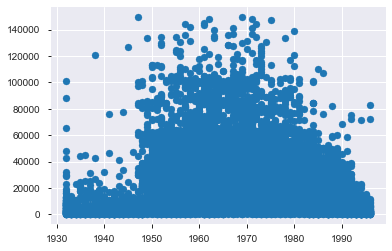

In [63]:
plt.scatter(ds['PB140: YEAR OF BIRTH'],ds['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME'])
ds['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME'].describe()

In [65]:
regmodel('PB140: YEAR OF BIRTH','PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME','yes' , 'no', 'Normalizer')

X:  PB140: YEAR OF BIRTH
Y:  PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME 

Intercept:  28179.879347615457
Coef:  [0.]
linear aMSE:  17668.988270099653
linear MSE:  521178569.1354263
linear R2:  -0.002247920906583989 

Regression Tree aMSE:  17668.98827009966
Regression Tree MSE:  521178569.13542634
Regression Tree R2:  -0.002247920906584211 

KNeighbores aMSE:  25890.620744726646
KNeighbores MSE:  907436659.3850724
KNeighbores R2:  -0.7450381866848803


In [66]:
tryclass_bin(try1,'PW130: TRUST IN THE POLITICAL SYSTEM',3, 'yes' , 'no', 'Normalizer')

PB140: YEAR OF BIRTH [2, NaN, 0, 1]
Categories (3, int64): [0 < 1 < 2]
PB150: SEX [1 2]
PB190: MARITAL STATUS [0, NaN, 2, 1]
Categories (3, int64): [0 < 1 < 2]
PE040: HIGHEST ISCED LEVEL ATTAINED [1, NaN, 2, 0]
Categories (3, int64): [0 < 1 < 2]
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS [0, NaN, 1, 2]
Categories (3, int64): [0 < 1 < 2]
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK [2 1]
PL051: OCCUPATION (ISCO-08 (COM)) [1, NaN, 0, 2]
Categories (3, int64): [0 < 1 < 2]
PL150: MANAGERIAL POSITION [ 1.  2. -1.]
PH010: GENERAL HEALTH [0, NaN, 1, 2]
Categories (3, int64): [0 < 1 < 2]
PW010: OVERALL LIFE SATISFACTION [2, NaN, 0, 1]
Categories (3, int64): [0 < 1 < 2]
PW080: FEELING DOWNHEARTED OR DEPRESSED [1, NaN, 0, 2]
Categories (3, int64): [0 < 1 < 2]
PW090: BEING HAPPY [0, NaN, 1, 2]
Categories (3, int64): [0 < 1 < 2]
PW180: HELP FROM OTHERS [0, NaN, 2]
Categories (2, int64): [0 < 2]
PW190: TRUST IN OTHERS [0, NaN, 1, 2]
Categories (3, int64): [0 < 1 < 2]
[0, NaN, 1]
Categori

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Decision tree - accuracy   10.46
Decision tree - precision 78.79 

[[155  54  31  46  43  26  55  26  16   5   0   0]
 [ 33  13   6  18  10   7  16   9   3   0   0   0]
 [ 28   7   3  11   9   9  12   6   4   2   0   0]
 [ 67  12  12  11  17  11  24  10   5   5   0   0]
 [ 65  14  13  19  17  15  34  12   9   4   0   0]
 [ 43  14  10  14  15  18  25   8   7   2   0   0]
 [129  31  16  40  36  19  47  20  10   8   0   0]
 [ 66  15  17  13  19  19  16  11   5   3   0   0]
 [ 74  26  14  21  24  17  33  15  12   5   0   0]
 [ 78  20  15  21  24  17  28  10  13   2   0   0]
 [ 36   9   4  10   5   6   5   2   1   2   0   0]
 [ 12   4   2   3   4   2   5   3   1   3   0   0]]
KNeighborsClassifier - accuracy   12.44
KNeighborsClassifier - precision 82.45 



In [67]:
#tryclass_multi(xes,yli,nrbinx, nrbiny)
#tryclass_multi(try1,'PW130: TRUST IN THE POLITICAL SYSTEM',4,4, 'yes' , 'yes', 'Normalizer')

In [68]:
###  try2 only with prior features based on RFE

In [69]:
ds=reload()
try2 =generateRFE (ds[try1], ds['PW130: TRUST IN THE POLITICAL SYSTEM'], 2)

6


In [70]:
#for x in range(2,6):
 #   tryclass_multi(try1,'PW130: TRUST IN THE POLITICAL SYSTEM',x,x, 'yes' , 'yes', 'Normalizer')


other way of binning:


ds=reload()
ds[yli]=ds[yli].apply(lambda x: 2 if (x <=2) & (x!=-1) else x)
ds[yli]=ds[yli].apply(lambda x: 4 if (x ==3) & (x==4) else x)
ds[yli]=ds[yli].apply(lambda x: 4 if (x ==3) & (x==4) else x)
ds[yli] =ds[yli].apply(lambda x: 6 if ((x ==6) | (x==7)) else x)
ds[yli].unique()
ds[yli].hist()

#### b) based on RFE- all

#### c) based on RFE- all

In [71]:
## based on RFE all columns
try3 = ['PE010: CURRENT EDUCATION ACTIVITY',
 'PL150: MANAGERIAL POSITION',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD070: Spend a small amount of money each week on yourself',
 'PW070: FEELING CALM AND PEACEFUL',
 'PW220: PHYSICAL SECURITY']

#try3
xes = generateRFE(ds[columns], ds[yli], 8)

12


RFE with Dummy-Features

In [75]:
## do rfe with dummy-features
ds=reload()
categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]
#columns.remove(yli)
create_dummy=set(columns).intersection(categorical)
create_dummy

{'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD060: Regularly participate in a leisure activity',
 'PD070: Spend a small amount of money each week on yourself',
 'PD080: Internet connection for personal use at home',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION'}

In [76]:
data_dummy = pd.get_dummies(ds[columns], columns=create_dummy, drop_first=True)
data_dummy.columns
data_dummy
generateRFE(data_dummy, ds[yli], 10)

14


['PW130: TRUST IN THE POLITICAL SYSTEM',
 'PB220A: CITIZENSHIP_1',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month_2.0',
 'PB200: CONSENSUAL UNION_3',
 'PL051: OCCUPATION (ISCO-08 (COM))_25.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_26.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_35.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_62.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_3.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_4.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_7.0',
 'PB190: MARITAL STATUS_5.0',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS_2.0',
 'PL150: MANAGERIAL POSITION_1.0']

In [77]:
try4 = generateRFE(data_dummy, ds[yli], 10)

14


In [78]:
X = data_dummy[try4]
y= ds[yli]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
#### b) DecisionTree Classify

dtc = DecisionTreeClassifier()#class_weight='balanced')#max_features=10,
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")
 

#### c) Support Vector Maschine
svm = SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 100.0%


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Algorithm Test Accuracy 100.0%


#### <span style="color:red"> Conclusion: No Model with accuracy</span>

# Stepwise as Backup
# 1 Data Selection and Preperation

#### 1.1. define features and Y

In [157]:
outcome = ds['PW010: OVERALL LIFE SATISFACTION']
features = ds[background]
outcomelist='PW010: OVERALL LIFE SATISFACTION'
featureslist=background

In [81]:
data =pd.merge(features, outcome, left_index=True, right_index=True)

In [82]:
data.head()

,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PW010: OVERALL LIFE SATISFACTION
0,1977,1,2.0,3,0,8.0
1,1936,1,2.0,1,0,7.0
2,1952,2,2.0,3,0,7.0
3,1938,2,2.0,3,0,6.0
4,1950,2,5.0,3,0,10.0


#### 1.2 make lefts skewed X categorical

In [83]:
shouldbecategorical= main_list = list(set(data.columns)-set(categorical)-set([outcomelist]))

#### 1.3 create dummies

In [ ]:
categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]

create_dummy=set(featureslist).intersection(categorical)

data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
data_dummy.columns

In [84]:
# use dummy:
data = data_dummy

# not use dummy:
#data = data =pd.merge(features, outcome, left_index=True, right_index=True)

# 2. Regression

#### <font color=red>here decide to keep or drop nan in the outcome: </font>

In [ ]:
## drop nan
#data = data[data[outcomelist]>=0]

#reset 
#data = data =pd.merge(features, outcome, left_index=True, right_index=True)

In [85]:
XCol=list(data.columns)
XCol.remove(outcomelist)
YCol=outcomelist

In [86]:
X = data[XCol]
y= data[YCol]

•	imbalance checking (undersampling, oversamplingML umbalanced data lib)

•	Split --> X_tr, y_tr, / X_ts,  y_ts

•	Try few models (with different algorithms) (<-- pipeline)

    –	Initialization

    –	Fit / predict

    –	Evaluation (overfitting / underfitting)

•	Choose best option based on requirements

•	Optimize the model

    –	Cross -validation

    –	Try few models (with same way to approach problem)

        o	Init

        o	Fit.(predict)

        o	Evaluation

    –	Hpyertuning


### 2.1 Test for imbalancing in Y

In [87]:
YCol

'PW010: OVERALL LIFE SATISFACTION'

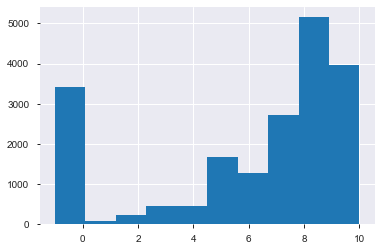

In [88]:
y.hist()

## it is very imbalanced  --> bin the values bellow 5 and change *dont know" to other value

In [ ]:
#y.loc[(y['PW130: TRUST IN THE POLITICAL SYSTEM']==-1), 'PW130: TRUST IN THE POLITICAL SYSTEM']= X

#### <font color=red>here decide how to bin y: </font>

In [91]:
y_binned=y.apply(lambda x: 0if (x <=5) & (x!=-1) else 1)
y_binned.unique()

array([1, 0], dtype=int64)

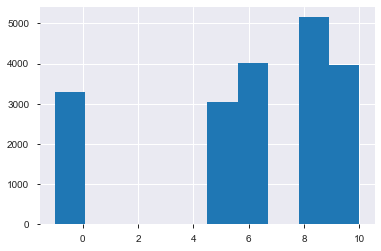

In [90]:
y_binned.hist()


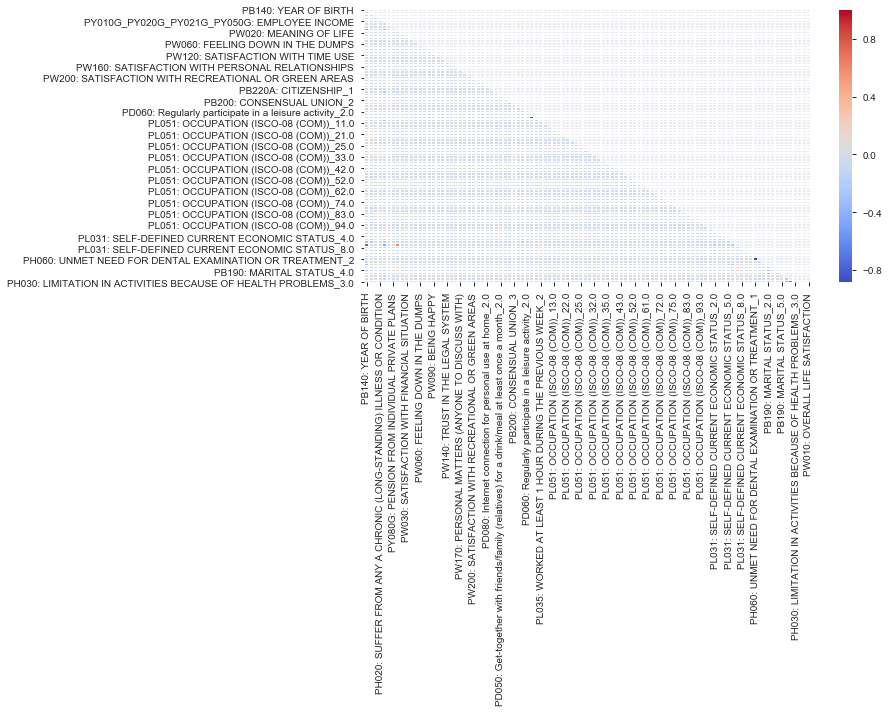

In [92]:
### just to check correlation
dset = pd.merge(X, y, left_index=True, right_index=True)


plt.figure(figsize =(10,5))
corr = dset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)

## 2.2. Scale

#### <font color=red>here decide to scale x or not and if yes which one: </font>

In [93]:
### scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape
X.columns

Index(['PB140: YEAR OF BIRTH', 'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G++: SOCIAL BENEFITS', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW18

In [95]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = scaler.fit_transform(X)
X_minmax.shape


(19463, 99)

## 2.3 Split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2)

## 2.4 run different models

#### a) Prepare Model 

In [98]:
## prepare interaction term
for d in range(2):
    interaction = PolynomialFeatures(degree = d, include_bias = False, interaction_only = True)
    X_inter = interaction.fit_transform(X_train)

#### b)  Linear Regression Model

In [97]:

lm = LinearRegression()
model = lm.fit(X_train,y_train)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

y_pred  = lm.predict(X_test)


Intercept:  5.635005074759052
Coef:  [ 0.17323    -0.18354642  0.10601402  0.21214741  0.3484948   0.21087569
  0.9285585   0.55956203 -0.0187821   0.06179104  0.10113871 -0.04264662
  0.06679993  0.04000088 -0.0550339   0.01907754 -0.10650816 -0.01134233
  0.02974048 -0.21552201 -0.02715986  0.30687196  0.20235886 -0.10945601
  0.02222903  0.07755857 -0.15023106  0.11259127  0.21099614 -0.09627632
  0.01357028  0.03033189 -0.05852049 -0.0806264  -0.23189393 -0.17442927
 -0.01357279 -0.13153181 -0.12503497 -0.03944136  0.08980568  0.15032548
  0.03258417 -0.04404632 -0.1709415   0.09702074  0.19293252  0.03819362
  0.17144281 -0.03810242  0.05655999  0.09766972 -0.07150842 -0.06487215
  1.35776487  0.01653293 -0.0832945   0.06201789 -0.25440013 -0.13220963
 -0.15652796 -0.04208652 -0.22714026  0.2685615   0.30210183 -0.09004317
 -0.11595968  0.09367781  0.0505635   0.00424185 -0.25881393 -0.01689576
  0.01204463  0.09842288 -0.49856765 -0.06626063  0.42409382  0.45828791
  0.0708416  -

In [99]:
mean_absolute_error(y_test, y_pred)

2.9421490350647725

In [100]:
mean_squared_error(y_test, y_pred)

13.090202513154837

In [101]:
r2_score(y_test, y_pred)

-0.0073406639835613685

#### c)  Taylor (pipeline)

#for k in range(1,8):
poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=3, include_bias = False, interaction_only = True), LinearRegression())

model = poly_model.fit(X_train, y_train)

    
print(poly_model.score(X_test, y_test))

y_pred  = poly_model.predict(X_test)


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

#### c)  Regression Tree

In [103]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

-1.0698651447041243

In [ ]:
#r = export_text(regr, feature_names=list(X.columns))
#print(r)

In [104]:
mean_absolute_error(y_test, y_pred)

3.914204983303365

In [105]:
mean_squared_error(y_test, y_pred)

26.897508348317494

In [106]:
r2_score(y_test, y_pred)


-1.0698651447041243

In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

#### d)  KNeighborsRegressor

In [107]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)


In [108]:
mean_absolute_error(y_test, y_pred)

3.25815566401233

In [109]:
mean_squared_error(y_test, y_pred)

17.25946856180609

In [110]:
r2_score(y_test, y_pred)

-0.328181477985626

#### <font color=red>huge means squared_error and negative r squared for binned and unbinned y
     also failed with drop nan, but way better!
    also failed with feature elimination

</font>

# 3. optimize recursive feature elimination (RFE)

In [111]:
## recursive feature elimination.
# initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [126]:
generateTest(columns[:-20],outcomelist, 'yes',  'yes', 'no')[0]

,PB140: YEAR OF BIRTH,PE040: HIGHEST ISCED LEVEL ATTAINED,PH010: GENERAL HEALTH,PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION,PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME,PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS,PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS,PY090G++: SOCIAL BENEFITS,PD080: Internet connection for personal use at home_2.0,PB220A: CITIZENSHIP_1,...,PD020: Replace worn-out clothes by some new (not second-hand) ones_2.0,PB190: MARITAL STATUS_2.0,PB190: MARITAL STATUS_3.0,PB190: MARITAL STATUS_4.0,PB190: MARITAL STATUS_5.0,PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS_1.0,PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS_2.0,PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS_3.0,PL150: MANAGERIAL POSITION_1.0,PL150: MANAGERIAL POSITION_2.0
9527,1993,3.0,3.0,2.0,7917.66,1170,0.0,0.00,0,0,...,0,0,0,0,0,1,0,0,0,1
4075,1990,3.0,1.0,2.0,35163.34,0,0.0,0.00,0,0,...,0,0,0,0,0,1,0,0,0,1
16283,1955,3.0,2.0,2.0,0.00,2000,0.0,0.00,1,0,...,0,1,0,0,0,0,0,0,1,0
6217,1958,5.0,1.0,1.0,28704.62,0,0.0,0.00,0,0,...,0,0,0,0,1,0,0,1,0,1
2241,1994,5.0,1.0,1.0,0.00,0,0.0,0.00,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,1988,3.0,1.0,2.0,5353.00,4560,0.0,3170.94,0,0,...,0,0,0,0,0,0,0,1,0,1
5085,1943,5.0,2.0,1.0,0.00,4700,0.0,16246.53,1,0,...,0,1,0,0,0,1,0,0,0,1
21856,1970,5.0,1.0,1.0,32707.83,0,0.0,0.00,0,0,...,1,1,0,0,0,0,0,1,0,1
9017,1951,3.0,2.0,2.0,0.00,2160,0.0,7726.97,0,0,...,0,1,0,0,0,0,1,0,0,1


Fit the model and print the ranking

In [130]:
# Your code here:
auto_model = LinearRegression()
selector = RFE(auto_model, 5, step=1)
model = selector.fit(generateTest(columns[:-20],outcomelist, 'yes',  'yes', 'no')[0],generateTest(columns[:-20],outcomelist, 'yes',  'yes', 'no')[2])

In [131]:
# Your code here:
selector.ranking_
#selector.support_

array([72, 61, 53, 67, 76, 73, 74, 75, 56, 46, 66, 58, 60,  7, 49, 62, 68,
       40, 41, 42, 70, 17,  4, 10, 65, 18, 14, 23, 16, 28, 64, 29, 32, 22,
        8, 13,  6, 20, 39, 38, 30, 36,  1, 69,  1, 71, 33, 34,  5, 15,  1,
       21,  1, 31, 25, 59, 24, 57, 35, 52, 19,  2, 11, 37, 27,  9, 26,  3,
        1, 51, 50, 55, 54, 12, 44, 63, 45, 48, 47, 43])

In [133]:
Xhere = generateTest(columns[:-20],outcomelist,  'yes', 'yes', 'no')[0]
rfe_col = []
for x in range(len(Xhere.columns)):
    if selector.ranking_[x]<=10:
        rfe_col.append(Xhere.columns[x])
print(len(rfe_col))
rfe_col

14


['PB200: CONSENSUAL UNION_2',
 'PL051: OCCUPATION (ISCO-08 (COM))_12.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_13.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_34.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_41.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_53.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_61.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_73.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_75.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_82.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_4.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_8.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_11.0',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT_1']

In [134]:
X=data[columns]
X.columns

Index(['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
       'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G++: SOCIAL BENEFITS',
       'PD020: Replace worn-out clothes by some new (not second-h

## 2.3 PCA

In [115]:
X = data[XCol]
X.shape

(19463, 99)

In [113]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastI-CA(n_components=0.99, whit-en=True)

# Conduct PCA
features_pca = pca.fit_transform(X)

In [114]:
X= features_pca
X.shape
## --> run 2.2 split and 2.3 models again

(19463, 2)

## 2. Classification

### 2.1.1 prepare data

In [158]:
data[columns].head()

,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK,PL051: OCCUPATION (ISCO-08 (COM)),...,PW130: TRUST IN THE POLITICAL SYSTEM,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
0,1977,1,2.0,3,0,2,3.0,1.0,2,52.0,...,3.0,6.0,10.0,8.0,2.0,1.0,-1.0,7.0,8.0,-1.0
1,1936,1,2.0,1,0,2,2.0,7.0,1,62.0,...,7.0,4.0,-1.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,1952,2,2.0,3,0,1,5.0,11.0,2,23.0,...,3.0,8.0,9.0,10.0,1.0,1.0,-1.0,10.0,6.0,2.0
3,1938,2,2.0,3,0,2,2.0,7.0,1,51.0,...,5.0,7.0,5.0,8.0,1.0,-1.0,6.0,9.0,5.0,3.0
4,1950,2,5.0,3,0,2,3.0,1.0,1,44.0,...,0.0,2.0,-1.0,2.0,1.0,-1.0,5.0,2.0,10.0,1.0


In [161]:
XCol=list(columns)
YCol=outcomelist
XCol.remove(outcomelist)


X = data[XCol]
y= data[YCol]

In [162]:
X.head()

,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK,PL051: OCCUPATION (ISCO-08 (COM)),...,PW130: TRUST IN THE POLITICAL SYSTEM,PW140: TRUST IN THE LEGAL SYSTEM,PW150: TRUST IN THE POLICE,PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS,PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH),PW180: HELP FROM OTHERS,PW190: TRUST IN OTHERS,PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS,PW210: SATISFACTION WITH LIVING ENVIRONMENT,PW220: PHYSICAL SECURITY
0,1977,1,2.0,3,0,2,3.0,1.0,2,52.0,...,3.0,6.0,10.0,8.0,2.0,1.0,-1.0,7.0,8.0,-1.0
1,1936,1,2.0,1,0,2,2.0,7.0,1,62.0,...,7.0,4.0,-1.0,8.0,1.0,1.0,8.0,0.0,6.0,2.0
2,1952,2,2.0,3,0,1,5.0,11.0,2,23.0,...,3.0,8.0,9.0,10.0,1.0,1.0,-1.0,10.0,6.0,2.0
3,1938,2,2.0,3,0,2,2.0,7.0,1,51.0,...,5.0,7.0,5.0,8.0,1.0,-1.0,6.0,9.0,5.0,3.0
4,1950,2,5.0,3,0,2,3.0,1.0,1,44.0,...,0.0,2.0,-1.0,2.0,1.0,-1.0,5.0,2.0,10.0,1.0


In [163]:
data['Y_class']= data[YCol].apply(lambda x: 1 if x>=8 else 0)

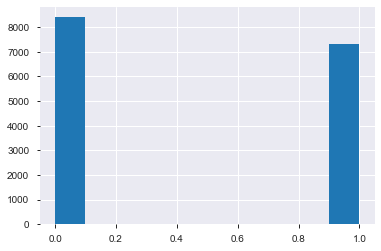

In [186]:
data['Y_class'].hist()
data['Y_class'].value_counts()
y=data['Y_class']
## --> balanced more or less

In [187]:
print(len(XCol))
print(YCol)

54
Y_class


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_test.shape


0        1
1        0
2        0
3        0
4        1
        ..
22037    0
22038    1
22039    1
22040    0
22041    1
Name: Y_class, Length: 15732, dtype: int64

#### a) Logistic Regression

In [192]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


y_pred=lr.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [193]:
acc = lr.score(X_test,y_test)
acc

0.511864406779661

In [194]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

#tn,fp,fn,tp = confusion_matrix(y_test, y_pred).flatten()
### it predicts all as 1...

accuracy: 51.19
precision: 51.52


array([[2208,  226],
       [2078,  208]], dtype=int64)

#### b) DecisionTree Classify

In [195]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [196]:
acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 50.06%


In [197]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

accuracy: 50.06
precision: 51.49


array([[1330, 1104],
       [1253, 1033]], dtype=int64)

In [198]:
## overfitting!!!

#### c) Support Vector Maschine

In [199]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [200]:
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

SVM Algorithm Test Accuracy 51.59%


In [201]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

accuracy: 51.59
precision: 51.58


#### d) K-Nearest Neighbour

In [202]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [203]:
acc = knn.score(X_test, y_test)*100
acc

50.12711864406779

In [205]:
conf=confusion_matrix(y_test, y_pred)
conf
print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))


accuracy: 50.13
precision: 51.08
